In [1]:
import os
os.chdir('..')

In [2]:
DATA_PATH = os.getcwd() + '\\temp'

In [61]:
import functools
from dataset.conclusion_generation import test_for_mental_models, generate_random_tree, generate_and_save_trees
from dataset.logic_tree import OperatorNode
from dataset.encoding import encode_mental_models_separated_sentences, load_sentences_and_conclusions

max_depth = 2
num_variables = 5
input_length = 10
output_length = 5

class SeparatorNode(OperatorNode):
    accepts_children = 2

    def __init__(self, *children):
        super(SeparatorNode, self).__init__('sep', *children)

    def evaluate(self, values):
        value = self._children[0].evaluate(values)
        for child in self._children[1:]:
            value = value and child.evaluate(values)

        return value

    def to_string(self):
        string = f'{self._children[0].to_string()}'
        for child in self._children[1:]:
            string += f' {self._operator_symbol} {child.to_string()}'
        return string


test_for_one_mental_models = functools.partial(test_for_mental_models, allow_only_one_mental_model=False)
# test_for_mental_models_type_two = functools.partial(test_for_mental_models, type_one=False)
# test_for_one_mental_models_type_two = functools.partial(test_for_mental_models, type_one=False,
#                                                         allow_only_one_mental_model=True)
generate_random_sep_tree = functools.partial(generate_random_tree, root_node_cls=SeparatorNode)

generate_and_save_trees('./data', 50000, 2, 5,
                        test_for_one_mental_models, generate_random_sep_tree,
                        base_name='and_trees_single_mms_type_I')

encode_mental_models_separated_sentences('./data', 2, 5, 10,
                                         'encoded_and_trees_single_mms_type_I',
                                         'and_trees_single_mms_type_I')
data = load_sentences_and_conclusions('./data', num_variables=5, max_depth=2,
                                      base_name='encoded_and_trees_single_mms_type_I')
sentences, mental_models, input_dictionary, output_dictionary = data

for i in range(10):
    print(sentences[i])
    print(mental_models[i])
    print()

Checked 100 (0.2%) trees, correct: 90, recently correct: 90.0%, eta: 03s
Checked 200 (0.4%) trees, correct: 172, recently correct: 82.0%, eta: 04s
Checked 300 (0.6%) trees, correct: 241, recently correct: 69.0%, eta: 05s
Checked 400 (0.8%) trees, correct: 316, recently correct: 75.0%, eta: 05s
Checked 500 (1.0%) trees, correct: 388, recently correct: 72.0%, eta: 05s
Checked 600 (1.2%) trees, correct: 461, recently correct: 73.0%, eta: 04s
Checked 700 (1.4%) trees, correct: 533, recently correct: 72.0%, eta: 04s
Checked 800 (1.6%) trees, correct: 585, recently correct: 52.0%, eta: 04s
Checked 900 (1.8%) trees, correct: 652, recently correct: 67.0%, eta: 04s
Checked 1000 (2.0%) trees, correct: 710, recently correct: 58.0%, eta: 04s
Checked 1100 (2.2%) trees, correct: 772, recently correct: 62.0%, eta: 04s
Checked 1200 (2.4%) trees, correct: 833, recently correct: 61.0%, eta: 04s
Checked 1300 (2.6%) trees, correct: 884, recently correct: 51.0%, eta: 04s
Checked 1400 (2.8%) trees, correct:

Checked 11200 (22.4%) trees, correct: 2958, recently correct: 11.0%, eta: 03s
Checked 11300 (22.6%) trees, correct: 2966, recently correct: 8.0%, eta: 03s
Checked 11400 (22.8%) trees, correct: 2973, recently correct: 7.0%, eta: 03s
Checked 11500 (23.0%) trees, correct: 2979, recently correct: 6.0%, eta: 03s
Checked 11600 (23.2%) trees, correct: 2987, recently correct: 8.0%, eta: 03s
Checked 11700 (23.4%) trees, correct: 2996, recently correct: 9.0%, eta: 03s
Checked 11800 (23.6%) trees, correct: 3004, recently correct: 8.0%, eta: 03s
Checked 11900 (23.8%) trees, correct: 3013, recently correct: 9.0%, eta: 03s
Checked 12000 (24.0%) trees, correct: 3018, recently correct: 5.0%, eta: 03s
Checked 12100 (24.2%) trees, correct: 3024, recently correct: 6.0%, eta: 03s
Checked 12200 (24.4%) trees, correct: 3031, recently correct: 7.0%, eta: 03s
Checked 12300 (24.6%) trees, correct: 3035, recently correct: 4.0%, eta: 03s
Checked 12400 (24.8%) trees, correct: 3042, recently correct: 7.0%, eta: 03

Checked 23200 (46.4%) trees, correct: 3401, recently correct: 0.0%, eta: 02s
Checked 23300 (46.6%) trees, correct: 3402, recently correct: 1.0%, eta: 02s
Checked 23400 (46.8%) trees, correct: 3403, recently correct: 1.0%, eta: 02s
Checked 23500 (47.0%) trees, correct: 3403, recently correct: 0.0%, eta: 02s
Checked 23600 (47.2%) trees, correct: 3403, recently correct: 0.0%, eta: 02s
Checked 23700 (47.4%) trees, correct: 3406, recently correct: 3.0%, eta: 02s
Checked 23800 (47.6%) trees, correct: 3407, recently correct: 1.0%, eta: 02s
Checked 23900 (47.8%) trees, correct: 3408, recently correct: 1.0%, eta: 02s
Checked 24000 (48.0%) trees, correct: 3408, recently correct: 0.0%, eta: 02s
Checked 24100 (48.2%) trees, correct: 3408, recently correct: 0.0%, eta: 02s
Checked 24200 (48.4%) trees, correct: 3408, recently correct: 0.0%, eta: 02s
Checked 24300 (48.6%) trees, correct: 3408, recently correct: 0.0%, eta: 02s
Checked 24400 (48.8%) trees, correct: 3409, recently correct: 1.0%, eta: 02s

Checked 35000 (70.0%) trees, correct: 3473, recently correct: 0.0%, eta: 01s
Checked 35100 (70.2%) trees, correct: 3474, recently correct: 1.0%, eta: 01s
Checked 35200 (70.4%) trees, correct: 3474, recently correct: 0.0%, eta: 01s
Checked 35300 (70.6%) trees, correct: 3474, recently correct: 0.0%, eta: 01s
Checked 35400 (70.8%) trees, correct: 3474, recently correct: 0.0%, eta: 01s
Checked 35500 (71.0%) trees, correct: 3475, recently correct: 1.0%, eta: 01s
Checked 35600 (71.2%) trees, correct: 3476, recently correct: 1.0%, eta: 01s
Checked 35700 (71.4%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 35800 (71.6%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 35900 (71.8%) trees, correct: 3476, recently correct: 0.0%, eta: 01s
Checked 36000 (72.0%) trees, correct: 3478, recently correct: 2.0%, eta: 01s
Checked 36100 (72.2%) trees, correct: 3478, recently correct: 0.0%, eta: 01s
Checked 36200 (72.4%) trees, correct: 3478, recently correct: 0.0%, eta: 01s

Checked 45700 (91.4%) trees, correct: 3483, recently correct: 0.0%, eta: 00s
Checked 45800 (91.6%) trees, correct: 3484, recently correct: 1.0%, eta: 00s
Checked 45900 (91.8%) trees, correct: 3485, recently correct: 1.0%, eta: 00s
Checked 46000 (92.0%) trees, correct: 3486, recently correct: 1.0%, eta: 00s
Checked 46100 (92.2%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46200 (92.4%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46300 (92.6%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46400 (92.8%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46500 (93.0%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46600 (93.2%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46700 (93.4%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46800 (93.6%) trees, correct: 3486, recently correct: 0.0%, eta: 00s
Checked 46900 (93.8%) trees, correct: 3486, recently correct: 0.0%, eta: 00s

In [4]:
import dataset

[[[7 2 9 3 6]
  [8 5 0 0 0]]

 [[8 5 0 0 0]
  [7 5 9 2 6]]

 [[7 4 9 5 6]
  [8 5 0 0 0]]

 [[7 5 9 2 6]
  [8 4 0 0 0]]

 [[7 3 9 1 6]
  [7 2 9 1 6]]]
[[[ 0  0  1  0 -1]
  [ 0  1  0  0 -1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  1  0  0 -1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0  1 -1]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  0  0 -1  1]
  [ 0  1  0 -1  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]

 [[ 0  1  1  0  0]
  [ 1  0  0  0  0]
  [ 0  0  0  0  0]
  [ 0  0  0  0  0]]]
max_input_length 5
input (None, 2, 5)
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_116 (InputLayer)          [(None, 2, 5)]       0                                            
__________________________________________________________________________________________________
embeddin

353/353 [==============================] - 1s 2ms/step - loss: 2.0788e-04 - val_loss: 4.3260e-04
Epoch 54/1000
353/353 [==============================] - 1s 2ms/step - loss: 2.4631e-04 - val_loss: 4.2810e-04
Epoch 55/1000
353/353 [==============================] - 1s 2ms/step - loss: 2.2631e-04 - val_loss: 3.6721e-04
Epoch 56/1000
353/353 [==============================] - 1s 2ms/step - loss: 1.9700e-04 - val_loss: 4.5155e-04
Epoch 57/1000
353/353 [==============================] - 1s 2ms/step - loss: 9.3692e-04 - val_loss: 8.5956e-04
Epoch 58/1000
353/353 [==============================] - 1s 2ms/step - loss: 2.8266e-04 - val_loss: 3.8522e-04
Epoch 59/1000
353/353 [==============================] - 1s 2ms/step - loss: 1.5162e-04 - val_loss: 3.1479e-04
Epoch 60/1000
353/353 [==============================] - 1s 2ms/step - loss: 1.2306e-04 - val_loss: 3.7345e-04
Epoch 61/1000
353/353 [==============================] - 1s 2ms/step - loss: 1.3337e-04 - val_loss: 3.5192e-04
Epoch 62/1000
3

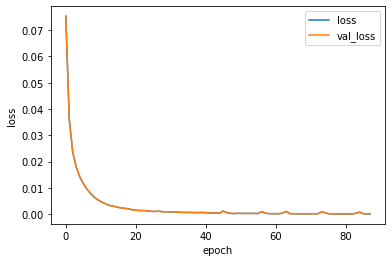

[[ 0.  0.  1.  1.  0.]
 [ 1.  0.  0.  1. -0.]
 [ 0.  0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.]] [[ 4.9091686e-02  1.1629745e-02  9.8684865e-01  9.9999923e-01
   1.1777163e-02]
 [ 9.9585819e-01  2.2813940e-02  1.0540880e-02  9.8938131e-01
  -7.0560486e-03]
 [ 5.3965749e-04  2.4323254e-03 -7.4696937e-04 -1.4434910e-03
  -4.1045054e-04]
 [ 5.9617124e-04  2.7829129e-03  2.6266626e-04  1.9197183e-04
   5.2001327e-05]
 [ 6.1835867e-04  1.6218697e-03 -2.4175621e-05  3.1232898e-04
   1.0916032e-05]] [[0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[-0.  0.  1. -0.  1.]
 [ 0.  0. -0. -0. -0.]
 [ 0.  0.  0. -0. -0.]
 [ 0.  0.  0. -0. -0.]
 [ 0.  0. -0. -0. -0.]] [[-2.8698638e-03  4.1573808e-02  9.9999964e-01 -3.1111209e-02
   1.0000000e+00]
 [ 1.1287497e-03  9.9623622e-04 -1.4079183e-03 -7.9647859e-04
  -2.6587674e-03]
 [ 2.3698265e-04  9.0800470e-04  1.4980417e-04 -2.7465500e-04
  -4.0076571e-04]
 [ 7.4876350e-04  6.7775545e-04  2.7

 [0. 0. 0. 0. 0.]]
[[ 1.  1.  0. -0.  1.]
 [ 0.  0.  0. -0. -0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0. -0.  0. -0.]
 [ 0. -0. -0. -0.  0.]] [[ 9.95678842e-01  9.99972582e-01  1.61743220e-02 -6.76914304e-03
   9.93514776e-01]
 [ 9.54754942e-04  6.62580016e-04  2.97876191e-04 -1.57564908e-04
  -3.98531556e-04]
 [ 1.31037552e-03 -1.54547859e-04  3.27736489e-04  1.63910387e-04
   1.21099874e-04]
 [ 8.20559857e-04 -2.60238070e-04 -3.23081156e-04  1.74566812e-04
  -2.93530524e-04]
 [ 6.95260940e-04 -6.12265430e-05 -7.92031409e-04 -2.82044581e-04
   2.26460397e-05]] [[1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[-0. -0. -0.  1.  0.]
 [ 0.  0.  1. -0. -0.]
 [ 0. -0.  0. -0. -0.]
 [ 0. -0.  0. -0. -0.]
 [ 0. -0.  0. -0. -0.]] [[-5.9972713e-03 -5.5786651e-03 -4.7842778e-02  9.9985957e-01
   1.5034333e-02]
 [ 1.2632697e-02  2.6477793e-02  9.9687868e-01 -1.5802033e-02
  -6.7793070e-03]
 [ 4.2762840e-04 -1.0534789e-03  1.5632490e-03 -3.8075267e-04
  -6.99634

In [98]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as kr


def broadcast(x, y):
    tf.print(x.shape, y.shape)
    x = x[..., np.newaxis]
    y = y[..., np.newaxis]
    x = np.transpose(x, axes=[0, 2, 1])
    y = np.transpose(y, axes=[2, 0, 1])
    x, y = np.broadcast_arrays(x, y)
    return x, y


def calculate_values(x, y):
    s = x + y
    sc = np.clip(s, -1, 1)
    return sc


def calculate_correctness(x, y):
    diff = 1 - np.maximum(0, np.abs(x - y) - 1)
    prod = np.prod(diff, axis=-1)
    return prod


def calculate_values_soft(x, y, av=10):
    return np.tanh((x + y) * av)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def calculate_correctness_soft(x, y, ac=10):
    diff = 1 - sigmoid((np.abs(x - y) - 1.5) * ac)
    prod = np.prod(diff, axis=-1)
    return prod


def calculate_out(values, correctness):
    result = values * correctness[..., np.newaxis]
    reshaped = np.reshape(result, (result.shape[0] * result.shape[1], result.shape[2]))
    return reshaped


def combine_mental_models(mm1, mm2):
    mm1b, mm2b = broadcast(mm1, mm2)
    values = calculate_values(mm1b, mm2b)
    correctness = calculate_correctness(mm1b, mm2b)
    out = calculate_out(values, correctness)
    return out


def combine_mental_models_soft(mm1, mm2):
    mm1b, mm2b = broadcast(mm1, mm2)
    values = calculate_values_soft(mm1b, mm2b, av=10)
    correctness = calculate_correctness_soft(mm1b, mm2b, ac=10)
    out = calculate_out(values, correctness)
    return out


def test_mm_inference():
    # (a or b)      ---> [T, n], [n, T]
    # (a or not b)  ---> [T, n], [n, F]
    mm1 = np.array([
        [1, 0],
        [0, 1],
    ])
    mm2 = np.array([
        [1, 0],
        [0, -1]
    ])

    combined_mental_models = combine_mental_models(mm1, mm2)
    combined_mental_models_soft = combine_mental_models_soft(mm1, mm2)
    print(combined_mental_models)
    print(combined_mental_models_soft)


class MMInferenceLayer(kr.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def broadcast(self, x, y):
        x = tf.expand_dims(x, axis=-1)
        y = tf.expand_dims(y, axis=-1)
        x = tf.transpose(x, perm=[0, 1, 3, 2])
        y = tf.transpose(y, perm=[0, 3, 1, 2])
        # x = tf.broadcast_to(x, (x.shape[0], x.shape[1]))
        # x, y =  np.broadcast_arrays(x, y)
        return x, y

    def call(self, inputs, **kwargs):
        x = inputs[0]
        y = inputs[1]

        x, y = self.broadcast(x, y)

        s = x + y
        value = tf.clip_by_value(s, -1, 1)
        # applicability = (tf.reduce_max(tf.abs(x), axis=-1) * tf.reduce_max(tf.abs(y), axis=-1))
        # value = value * tf.expand_dims(applicability, axis=-1)

        diff = 1 - tf.maximum(0., tf.abs(x - y) - 1.)
        correctness = tf.reduce_prod(diff, axis=-1)
        mms = value * tf.expand_dims(correctness, axis=-1)
        reshaped_value = tf.reshape(mms, (-1, mms.shape[-3] * mms.shape[-2], mms.shape[-1]))
        reshaped_correctness = tf.reshape(correctness, (-1, correctness.shape[-2] * correctness.shape[-1]))
        mm = tf.reduce_sum(reshaped_value, axis=-2)
        mm = mm / tf.reduce_sum(reshaped_correctness, axis=-1, keepdims=True)
        # mm = tf.clip_by_value(mm, -1, 1)
        # mm = tf.tanh(mm)
        return mm


def create_inference_model(num_variables, max_input_length, max_sub_mental_models):
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    input = kr.Input(shape=(2, max_input_length))
    split_layer = kr.layers.Lambda(lambda x: (x[:, 0], x[:, 1]))(input)

    nn_input = kr.Input(max_input_length)
    nn_embedding_layer = kr.layers.Embedding(num_symbols + 1, embedding_size)(nn_input);print(nn_embedding_layer)
    flatten_layer = kr.layers.Flatten()(nn_embedding_layer);print(flatten_layer.shape)
    nn_hidden = kr.layers.Dense(hidden_units, activation='relu')(flatten_layer)
    nn_output = kr.layers.Dense(num_variables * max_sub_mental_models,
                                activation='tanh',
                                activity_regularizer=kr.regularizers.L1(0.0))(nn_hidden)
    nn_reshape = kr.layers.Reshape((max_sub_mental_models, num_variables))(nn_output)
    sub_sequence_nn = kr.Model(inputs=nn_input, outputs=nn_reshape, name='sub-sequence-NN')
    sub_sequence_nn.summary()

    mm = sub_sequence_nn(split_layer[0]), sub_sequence_nn(split_layer[1])
    mm_inference_layer = MMInferenceLayer()(mm)

    model = kr.Model(inputs=input, outputs=mm_inference_layer)
    model.summary()

    return model

def create_varying_inference_model(num_variables, max_input_length):
    embedding_size = 10
    hidden_units = 128
    print('max_input_length', max_input_length)
    input = kr.Input(shape=(2, max_input_length))

    print('input',input.shape)
    
    nn_input = kr.Input(shape=(num_variables))
    nn_embedding_layer = kr.layers.Embedding(num_symbols+1, embedding_size)(input)
    nn_flatten = tf.keras.layers.Reshape((nn_embedding_layer.shape[1],-1))(nn_embedding_layer)
    encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    encoder_outputs, state_h, state_c = encoder(nn_flatten)
    encoder_states = [state_h, state_c]
    
    decoder_inputs = kr.Input(shape=(None,num_variables))
    decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
    decoder_outputs, _, _ = decoder(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = kr.layers.Dense(num_variables, activation='tanh')
    output = decoder_dense(decoder_outputs)
    
#     nn_input = kr.Input(max_input_length)
#     nn_embedding_layer = kr.layers.Embedding(num_symbols + 1, embedding_size)(nn_input)
#     flatten_layer = kr.layers.Flatten()(nn_embedding_layer)
#     print('flatten',flatten_layer.shape)
#     encoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
#     encoder_outputs, state_h, state_c = encoder(flatten_layer)

#     decoder = kr.layers.LSTM(hidden_units, return_sequences=True, return_state=True, activation='relu')
#     decoder_outputs, _, _ = decoder(decoder_inputs,
#                                          initial_state=encoder_states)
#     decoder_dense = kr.layers.Dense(num_variables, activation='tanh')
#     decoder_outputs = decoder_dense(decoder_outputs)

    model = kr.Model(inputs=[input, decoder_inputs], outputs=output)
    model.summary()

    return model


def two_way_mse(y_true, y_pred):
    y_true_float = tf.cast(y_true, y_pred.dtype)
    diff = (y_true_float - y_pred) ** 2
    print(diff)
    return tf.reduce_mean(diff)


def show_subsentence_inference(model, ds, decoding_dictionary, idxs):
    sub_model = model.layers[2]
    for i in idxs:
        for j in range(2):
            x = ds.x_test[i][j]
            pred = sub_model.predict(x[np.newaxis, ...])
            print(dataset.encoding.decode_sentence(x, decoding_dictionary, ds.indexed_encoding))
            print(np.rint(pred))
            
def add_zero_row(data, position):
    if position == 'front':
        temp = np.zeros((data.shape[0],data.shape[1]+1,data.shape[2]))
        temp[:,1:,:] = data
    elif position == 'last':
        temp = np.zeros((data.shape[0],data.shape[1]+1,data.shape[2]))
        temp[:,:-1,:] = data
        
    return temp



if __name__ == '__main__':
    import matplotlib.pyplot as plt

    # xs, ys = create_ds()

    from dataset.common import get_separated_sequences_mental_models_dataset
    import dataset.encoding
    ds = get_separated_sequences_mental_models_dataset('./data', 'encoded_and_trees_single_mms_type_I',
                                                       num_variables=5, max_depth=2,
                                                       test_size=.1, valid_size=.1,
                                                       indexed_encoding=True, pad_mental_models=True)

    dec_in, dec_out = dataset.encoding.create_decoding_dictionaries(ds.input_dictionary, ds.output_dictionary)

#     ds.y_train = ds.y_train[..., 0, :]
#     ds.y_valid = ds.y_valid[..., 0, :]
#     ds.y_test = ds.y_test[..., 0, :]

    ds.y_train_d = add_zero_row(ds.y_train, 'front')
    ds.y_train = add_zero_row(ds.y_train, 'last')
    ds.y_valid_d = add_zero_row(ds.y_valid, 'front')
    ds.y_valid = add_zero_row(ds.y_valid, 'last')
    ds.y_test_d = add_zero_row(ds.y_test, 'front')
    ds.y_test = add_zero_row(ds.y_test, 'last')
    
    
#  decoder_train = 
    
    num_variables = 5
    num_operators = 5  # and, or, not
    num_symbols = num_variables + num_operators
    max_input_length = ds.x_train.shape[-1]

#     model = create_inference_model(num_variables, max_input_length,3)
    model = create_varying_inference_model(num_variables, max_input_length)
    model.compile(optimizer=kr.optimizers.Adam(learning_rate=1e-3),
                  loss=kr.losses.mse)

    callbacks = [kr.callbacks.EarlyStopping(patience=20, min_delta=1e-5, restore_best_weights=True)]
    history = model.fit([ds.x_train, ds.y_train_d], ds.y_train, validation_data=([ds.x_valid, ds.y_valid_d], ds.y_valid),
                        epochs=1000, batch_size=8, callbacks=callbacks)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(len(loss)), loss, label='loss')
    plt.plot(range(len(val_loss)), loss, label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    preds = model.predict([ds.x_test, ds.y_test_d])
    preds_int = np.rint(preds)
#     for i in range(preds.shape[0]):
#         print(preds_int[i], preds[i], ds.y_test[i])

    print('errors:')
    for i in range(preds_int.shape[0]):
        if np.sum(np.abs(preds_int[i] - ds.y_test[i])) == 0:
            continue
        print(dataset.encoding.decode_sentence(ds.x_test[i][0], dec_in, ds.indexed_encoding))
        print(dataset.encoding.decode_sentence(ds.x_test[i][1], dec_in, ds.indexed_encoding))
        print(preds_int[i], ds.y_test[i])
        print(preds[i])
        print()

    errors = np.count_nonzero(np.sum(np.abs(preds_int - ds.y_test), axis=-1))
    print('errors', int(errors))
    print(f'accuracy: {int((1 - int(errors)/ds.x_test.shape[0]) * 1000) / 10}%')

In [26]:
import torch
import torch.nn as nn
from torch import optim
import random

class Encoder(nn.Module):
    """ A GRU-based encoder. """
    def __init__(self, input_vocab_size, hidden_size, emb_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_vocab_size, emb_size)
        self.gru = nn.GRU(emb_size, hidden_size)

    def forward(self, input, hidden=None):
        if hidden is not None:  # Update hidden states step by step
            embedded = self.embedding(input).view(1, 1, -1)
            output = embedded
            output, hidden = self.gru(output, hidden)
        else:   # In case we only need the last state
            embedded = self.embedding(input).view(len(input), 1, -1)
            output, hidden = self.gru(embedded)
        return output, hidden

    def init_hidden(self):
        '''Initialize hidden state'''
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [27]:
class Decoder(nn.Module):
    """ A GRU-based decoder. """
    def __init__(self, hidden_size, output_vocab_size, emb_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_vocab_size, emb_size)
        self.gru = nn.GRU(emb_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_vocab_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # Output word embedding
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        # Update decoder hidden state
        output, hidden = self.gru(output, hidden)
        # Distribution over output vocabulary
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def init_hidden(self):
        '''Initialize hidden state'''
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [67]:
import numpy as np
sentences[0][1]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [28]:
input_size = sentences[0][0].shape[1]
output_size = mental_models[0][0].size
hidden_size = 128
report_every = 1000

# Initialize encoder and decoder
enc = Encoder(input_size, hidden_size, emb_size=8)
dec = Decoder(hidden_size, output_size, emb_size=8)

# Initialize the optimizers
enc_optimizer = optim.Adam(enc.parameters())
dec_optimizer = optim.Adam(dec.parameters())
loss_function = nn.NLLLoss()
print_loss_total = 0

for epoch in range(1, 4):  # Train for 3 epochs
    random.shuffle(tensor_dataset)
    for i, instance in enumerate(tensor_dataset):
        src_sequence, tgt_sequence = instance[0], instance[1]
        _, last_enc_state = enc(src_sequence)
        # Create BOS token - First decoder input is the start token 
        decoder_input = torch.tensor([[generator.token_to_idx['<s>']]], device=device)
        # First decoder hidden state is the last encoder hidden state
        decoder_hidden = last_enc_state
        loss = 0

        # For each decoder timestep
        for i_decoder in range(len(tgt_sequence)):
            # Feed decoder input to decoder hidden state. Also feed in encoder outputs for calculating context
            decoder_output, decoder_hidden = dec(decoder_input, decoder_hidden)
            loss += loss_function(decoder_output, tgt_sequence[i_decoder])
            # When training, use the correct label at this step at input to the decoder 
            decoder_input = tgt_sequence[i_decoder]

        loss.backward()

        enc_optimizer.step()
        dec_optimizer.step()
        enc.zero_grad()
        dec.zero_grad()

        print_loss_total += loss.item() / len(tgt_sequence)

        if (i != 0 and i % report_every == 0) or i == len(tensor_dataset)-1:
            print('Epoch {0}: trained {1} input-output pairs, loss {2:.4f}'.format(epoch, i, print_loss_total / report_every))
            print_loss_total = 0

NameError: name 'tensor_dataset' is not defined

In [ ]:
n_tests = 10
n_correct = 0
input_min_val = 10
input_max_val = 100

with torch.no_grad():
    for i in range(n_tests):
        test_pair = generator.generate_equation(input_min_val, input_max_val)
        input_seq = tensor_from_character_sequence(test_pair[0], generator.token_to_idx)

        _, last_enc_state = enc(input_seq)

        # Create BOS token - First decoder input is the start token 
        decoder_input = torch.tensor([generator.token_to_idx['<s>']], device=device)
        # First decoder hidden state is the last encoder hidden state
        decoder_hidden = last_enc_state

        decoded_words = []
        # For each decoder timestep
        for i_decoder in range(10):
            # Feed decoder input to decoder hidden state. Also feed in encoder outputs for calculating context
            decoder_output, decoder_hidden = dec(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)

            if topi.item() == generator.token_to_idx['</s>']:
                break
            else:
                decoded_words.append(generator.idx_to_token[topi.item()])
            # When testing, use the model prediction
            decoder_input = topi.squeeze().detach()

        model_output = ''.join(decoded_words)

        if model_output == test_pair[1]:
            n_correct += 1
            marker = ''
        else:
            marker = '<--------'
        print('Input:\t', test_pair[0])
        print('Model output:\t', model_output, marker)
        print('Ground truth:\t', test_pair[1], '\n')

    print('{0}/{1}, correct rate: {2:0.0%}'.format(n_correct, n_tests, n_correct/n_tests))